In [1]:
import numpy as np
import matplotlib.pyplot as plt

import polyseq as pseq

%matplotlib inline
np.random.seed(42)

In [2]:
pseq.io.download_example_data()

data = pseq.io.load_example()
data.head()

,Nep3,tRNA:Pro-CGG-1-1,CG9570,Or19b,CG15322,Or19a,karr,fd19B,CG17003,CG12655,...,Plap,CG5080,Tfb4,Iris,Pino,CG4629,S,EGFP,tdTomato,GAL4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
dropped = data.drop_genes(num_cells=1)
print(data.shape)
print(dropped.shape)

(906, 17492)
(906, 9130)


,min,max,mean,median
umis,0,1053,0,0
umis above 0,1,1053,2,1
umis per cell cell,743,11228,1486,1164
genes expressed,362,2818,742,662
umis per gene,1,77103,147,28
cells expressing,0,906,23,1


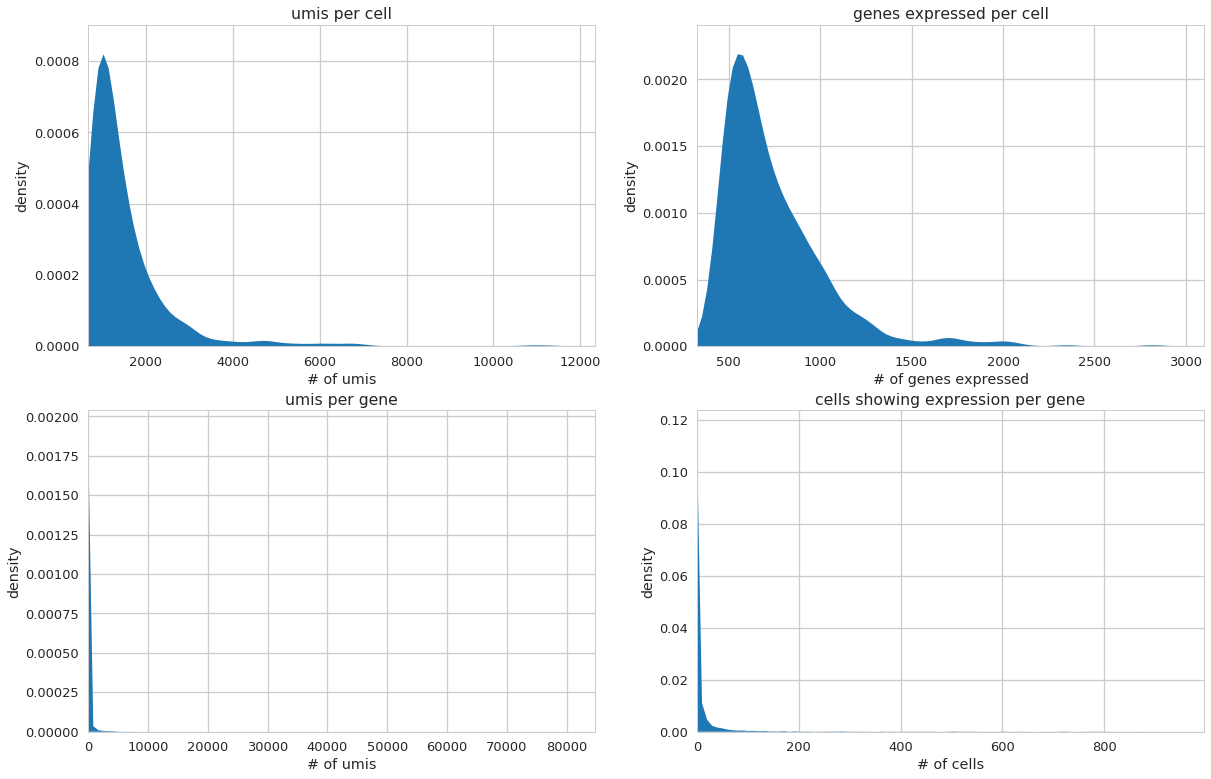

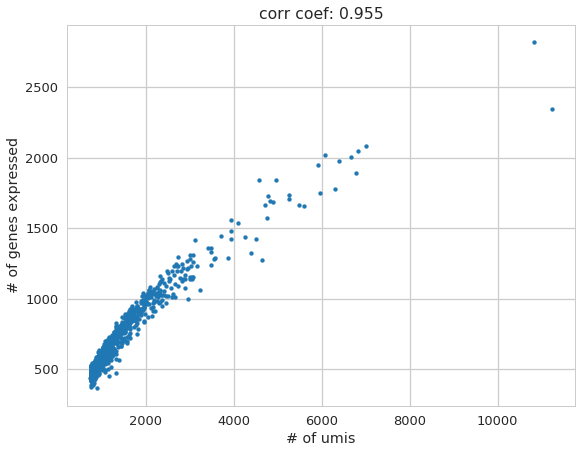

In [4]:
stats = pseq.summary.summarize(dropped)
stats

In [5]:
normed = dropped.log_normalize()
total = normed.sum(axis=1)
regressed = pseq.regress(normed, total[:, np.newaxis])
regressed.head()

,Nep3,CG33217,Vps11,RpL10,G9a,cin,y,sc,l(1)sc,ase,...,CG5118,Plap,CG5080,Tfb4,Pino,CG4629,S,EGFP,tdTomato,GAL4
0,-0.550409,-0.805103,-0.772099,-0.260244,-0.975793,-0.413805,-0.511423,0.049744,-0.097752,-0.275277,...,-0.192668,-0.776220,-0.533113,-0.297524,-0.550203,-0.586450,-1.213666,-0.435544,-0.570921,-0.078332
1,4.097735,2.769397,-0.339962,-0.321946,-0.494048,-0.200104,-0.193864,-0.022132,-0.062985,-0.145458,...,-0.121801,-0.280349,-0.236816,-0.131499,-0.232080,-0.288634,-0.537623,5.748263,-0.231110,-0.110789
2,-0.134333,-0.174923,-0.123434,0.081624,-0.252664,-0.093026,-0.034747,-0.058147,-0.045565,-0.080411,...,-0.086293,-0.031887,-0.088352,-0.048311,4.960913,-0.139410,2.323554,-0.087804,-0.060843,-0.127052
3,-0.143933,-0.189462,-0.138400,1.026878,-0.269348,-0.100427,-0.045744,-0.055657,-0.046769,-0.084907,...,9.041346,-0.049060,-0.098613,-0.054060,-0.083698,-0.149724,2.300141,-0.095827,-0.072611,-0.125928
4,-0.200246,2.879925,-0.226192,0.189724,-0.367218,-0.143842,-0.110259,-0.041055,-0.053832,-0.111281,...,-0.103144,-0.149800,-0.158809,-0.087790,-0.148328,-0.210227,-0.359639,-0.142891,-0.141647,-0.119334


,pc-0,pc-1,pc-2,pc-3,pc-4,pc-5,pc-6,pc-7,pc-8,pc-9,pc-10,pc-11,pc-12,pc-13,pc-14
0,10.759341,36.023065,6.806370,-3.365493,0.168374,0.909364,-5.099287,8.950067,18.643288,7.977740,9.625995,1.444753,57.107532,5.254824,-21.233768
1,-8.387182,-2.045313,-3.024775,1.873986,-2.376047,0.959078,-2.183072,0.136391,-2.604294,-0.307371,-7.259884,-1.122497,-1.935003,-0.654377,-0.763942
2,11.271399,-5.363713,2.145454,3.421776,-1.062474,0.223716,2.292320,0.448712,-0.179425,0.611136,4.401240,-0.264146,1.484913,2.171634,3.023894
3,5.577005,4.166702,2.423080,0.021207,0.229589,-1.090887,0.269033,1.124113,-0.289047,-0.038308,-0.066664,-0.787983,1.512400,1.192202,-0.081434
4,-1.151384,1.434671,4.277801,-4.605186,4.694904,-1.369935,0.732650,3.124217,-0.249238,0.531160,-0.328050,-2.745555,-0.964223,-0.585820,-2.539093


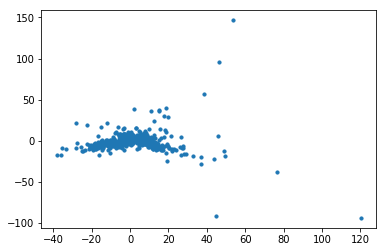

In [6]:
reduced = pseq.dim.pca(regressed, k=15)

plt.scatter(reduced['pc-0'], reduced['pc-1'], s=10)
reduced.head()

In [7]:
clusters = pseq.clustering.graph_cluster(reduced, n_neighbors=100)
print("# of clusters: ", len(np.unique(clusters)))

Finding 100 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.1494598388671875 seconds
Jaccard graph constructed in 3.6717398166656494 seconds
Wrote graph to binary file in 0.9008018970489502 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.623959
Louvain completed 21 runs in 3.3681600093841553 seconds
PhenoGraph complete in 8.359226942062378 seconds
# of clusters:  5


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 906 samples in 0.005s...
[t-SNE] Computed neighbors for 906 samples in 0.080s...
[t-SNE] Computed conditional probabilities for sample 906 / 906
[t-SNE] Mean sigma: 1.816103
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.956154
[t-SNE] Error after 1000 iterations: 1.199699


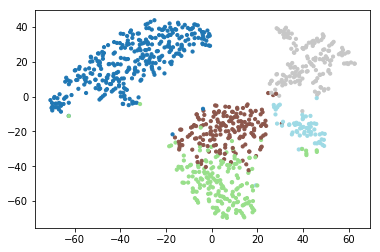

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=10.0, verbose=True).fit_transform(reduced)
plt.scatter(tsne[:, 0], tsne[:, 1], s=10, c=clusters, cmap='tab20')

In [9]:
top_genes = pseq.upregulated(normed, clusters, n=3)

print("\n\n---\n")
for i, genes in enumerate(top_genes):
    print(genes)

finding genes for cluster 1
[LibLinear]finding genes for cluster 2
[LibLinear]finding genes for cluster 3
[LibLinear]finding genes for cluster 4
[LibLinear]finding genes for cluster 5
[LibLinear]

---

['futsch', '14-3-3zeta', 'Cam']
['Hsp23', 'sbb', 'wde']
['pros', 'jim', 'RpS29']
['fabp', 'Obp44a', 'CAH1']
['CR43283', 'CG3800', 'Pen']


/Users/jason/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)


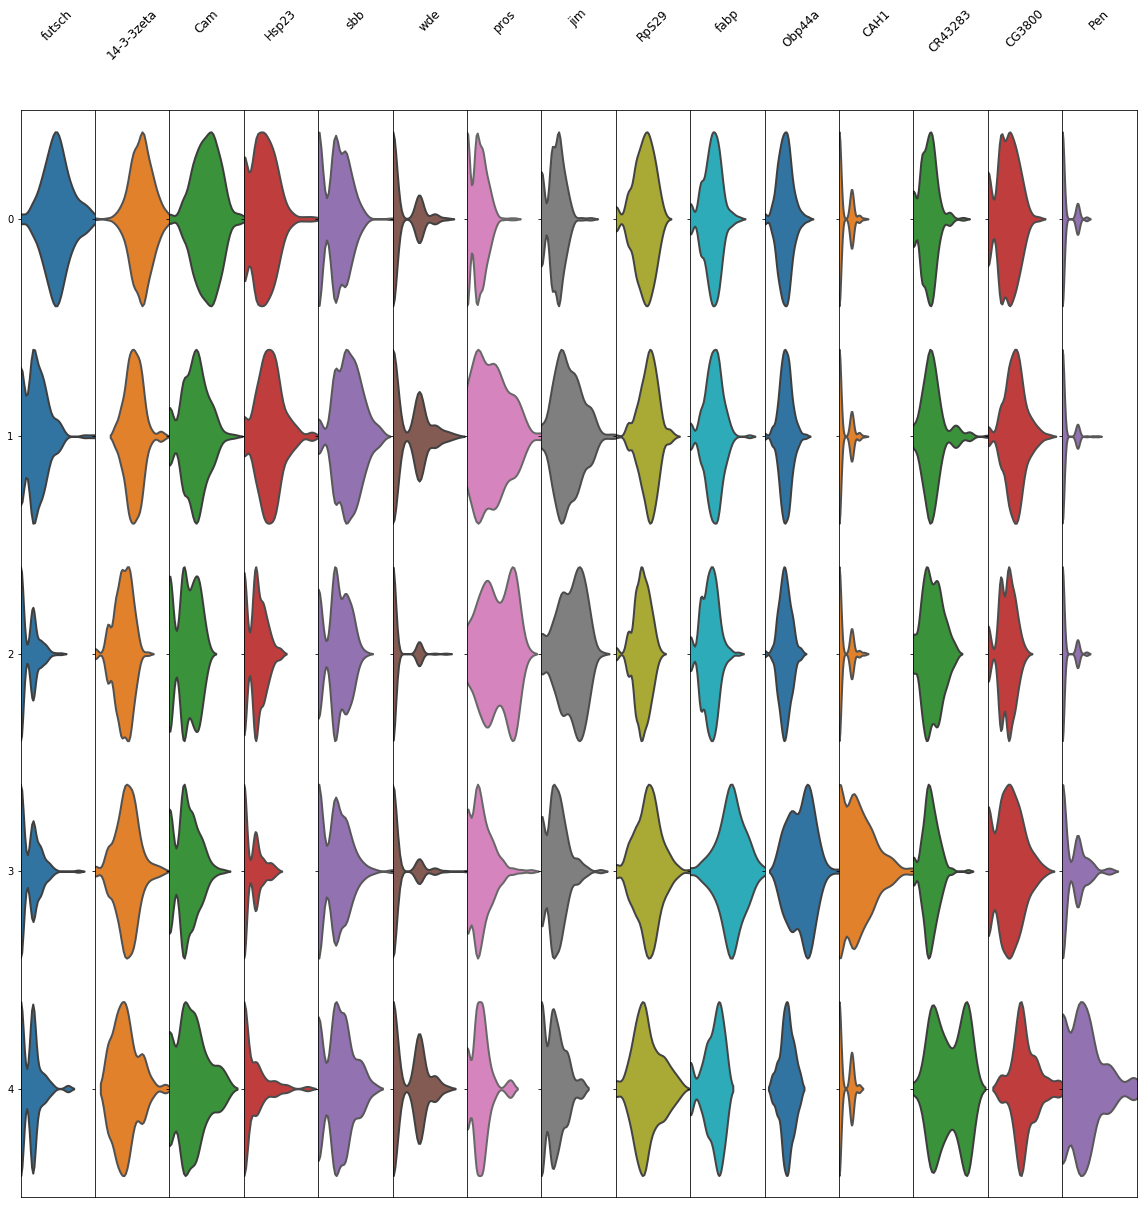

In [10]:
genes = sum(top_genes, []) # append all lists into single list
pseq.viz.violins(normed, genes, groups=clusters, cluster_genes=False)